```
   ___      _          _          _                         _         
  / _ \  __| | ___  __| | ___  __| |_ __ _____      ___ __ | | ___   
 / /_)/ / _` |/ _ \/ _` |/ _ \/ _` | '__/ _ \ \ /\ / / '_ \| |/ _ \  
/ ___/ | (_| |  __/ (_| |  __/ (_| | | |  __/\ V  V /| |_) | |  __/  
\/      \__,_|\___|\__,_|\___|\__,_|_|  \___| \_/\_/ | .__/|_|\___|  
                                                   |_|               
```

# Data Analysis Notebook
In this notebook, we analyze the **final processed personal health dataset** containing:
- Days, Weight(kg), Step_count, Gym, Calorie(kcal)
- Additional engineered columns: Gym_Bool, Day_Type, Weight_Change, Step_RollingAvg_7d

## Table of Contents
1. [Introduction](#introduction)
2. [Research Questions](#research-questions)
3. [Imports & Data Loading](#imports-and-data)
4. [Exploratory Data Analysis (EDA)](#eda)
5. [Question 1: Calorie Intake & Weight Changes](#q1)
6. [Question 2: Physical Activity & Weight Management](#q2)
7. [Question 3: Interplay Between Calorie Intake & Physical Activity](#q3)
8. [Question 4: Temporal Patterns & Trends](#q4)
9. [Conclusion](#conclusion)


<a id='introduction'></a>
## 1. Introduction
The dataset captures daily records of **body weight**, **steps**, **calories**, and whether or not a gym session occurred. We have also derived features like:
- **Gym_Bool**: `True` if Gym == "Yes`, otherwise `False`.
- **Day_Type**: Whether the day is a `Weekday` or `Weekend`.
- **Weight_Change**: The day-to-day difference in weight.
- **Step_RollingAvg_7d**: A 7-day rolling average of step counts.

Our goal is to address multiple research questions through statistical tests and patterns in the data.

<a id='research-questions'></a>
## 2. Research Questions
1. **Calorie Intake & Weight Changes**  
   - *How does daily calorie intake correlate with weight fluctuations?*  
   - *Are there patterns that precede weight gain or loss?*

2. **Physical Activity & Weight Management**  
   - *What is the relationship between daily steps/gym visits and weight changes?*  
   - *Does higher physical activity contribute significantly to weight loss or maintenance?*

3. **Interplay Between Calorie Intake & Physical Activity**  
   - *How do calories and steps together influence weight over time?*  
   - *Which combinations of calorie consumption and activity appear optimal?*

4. **Temporal Patterns & Trends**  
   - *Are there weekday/weekend differences in weight, steps, or calories?*  
   - *Are there long-term trends or seasonal patterns (if we had enough data)?*

<a id='imports-and-data'></a>
## 3. Imports & Data Loading
We'll bring in necessary Python libraries and load the `my_personal_health_data_processed.csv` file, which was produced after data processing.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_theme(style="whitegrid", context="notebook")

# Load the processed data
df = pd.read_csv("my_personal_health_data_processed.csv")

print("Data loaded. Shape:", df.shape)
display(df.head())

Data loaded. Shape: (43, 9)


,Days,Weight(kg),Step_count,Gym,Calorie(kcal),Gym_Bool,Day_Type,Weight_Change,Step_RollingAvg_7d
0,Thursday,89.5,4500,Yes,3410,True,Weekday,0.0,0.0
1,Sunday,89.3,3254,Yes,3410,True,Weekend,-0.2,0.0
2,Monday,91.2,4149,No,3410,False,Weekday,1.9,0.0
3,Tuesday,90.8,7342,Yes,3410,True,Weekday,-0.4,0.0
4,Wednesday,90.7,7784,Yes,3410,True,Weekday,-0.1,0.0


<a id='eda'></a>
## 4. Exploratory Data Analysis (EDA)
Before diving into each research question, let's:
1. Review summary statistics (mean, std, etc.).
2. Look at correlation among numerical features.
3. Potentially identify any data anomalies.

,Weight(kg),Step_count,Calorie(kcal),Weight_Change,Step_RollingAvg_7d
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,92.579070,5310.093023,3691.046512,0.134884,4705.671096
std,2.195944,2620.707882,301.021195,2.222170,2197.246462
min,83.900000,1649.000000,3410.000000,-9.300000,0.000000
25%,91.250000,2603.500000,3660.000000,-0.200000,3650.642857
50%,92.600000,4505.000000,3660.000000,0.000000,5738.714286
75%,94.250000,7590.000000,3660.000000,0.400000,6197.785714
max,95.700000,10136.000000,4875.000000,10.500000,6983.571429


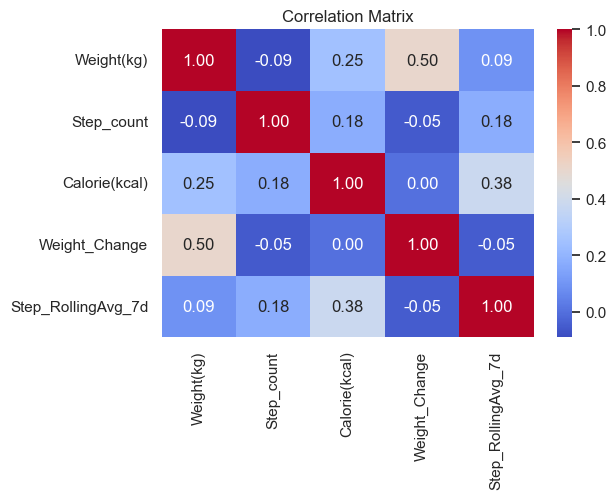


Observations:
- Check the sign and strength of correlations between weight and calorie intake, steps, etc.


In [4]:
# 4.1 Summary Stats
display(df.describe())

# 4.2 Check correlation among numeric columns
numeric_cols = ['Weight(kg)', 'Step_count', 'Calorie(kcal)', 'Weight_Change', 'Step_RollingAvg_7d']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

print("\nObservations:")
print("- Check the sign and strength of correlations between weight and calorie intake, steps, etc.")

<a id='q1'></a>
## 5. Question 1: Calorie Intake & Weight Changes
**Research Aim**: How does daily calorie intake correlate with fluctuations in body weight?

### Hypothesis
- **Null Hypothesis (H0)**: There is **no** significant correlation between daily calorie intake and weight.
- **Alternative Hypothesis (H1)**: There **is** a significant correlation between daily calorie intake and weight.

**Plan**:
1. We’ll compute Pearson correlation between `Weight(kg)` and `Calorie(kcal)`.
2. Perform a linear regression or simple scatter + regression line to visualize.
3. Check if prior day’s calories relate to next day’s weight (`Calorie(kcal)` shifted by 1).

Pearson correlation (Weight vs. Calories): 0.246


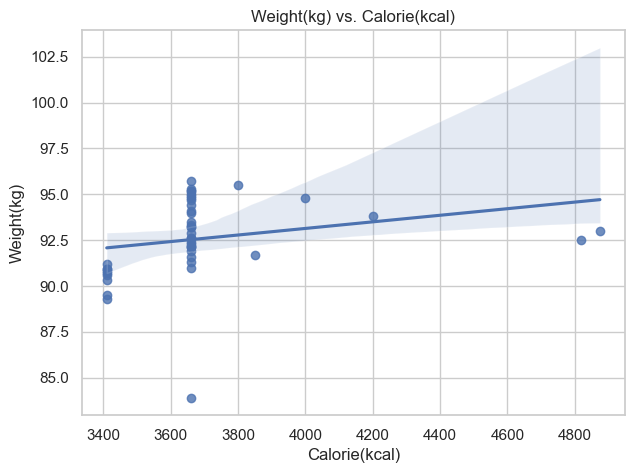

Pearson correlation (Today Weight vs. Previous-Day Calories): 0.323


In [5]:
# 5.1 Correlation between Calorie(kcal) & Weight(kg)
corr_cal_weight = df['Calorie(kcal)'].corr(df['Weight(kg)'])
print(f"Pearson correlation (Weight vs. Calories): {corr_cal_weight:.3f}")

# 5.2 Scatter + regression
import seaborn as sns
plt.figure(figsize=(7,5))
sns.regplot(x='Calorie(kcal)', y='Weight(kg)', data=df)
plt.title("Weight(kg) vs. Calorie(kcal)")
plt.show()

# 5.3 Check previous-day calories -> today's weight
df['Calorie_PrevDay'] = df['Calorie(kcal)'].shift(1)
corr_lead = df['Weight(kg)'].corr(df['Calorie_PrevDay'])
print(f"Pearson correlation (Today Weight vs. Previous-Day Calories): {corr_lead:.3f}")

**Interpretation**:
- If the correlation is close to 0, it suggests no strong linear relationship.
- If the correlation is positive (e.g., > 0.3), we might suspect higher calorie intake aligns with higher weight.
- Checking how *previous day’s calories* relate to *today’s weight* can be more relevant for cause/effect timing.

_If p-values or a more formal test is needed, we can use a linear regression or repeated measures approach. But for a quick check, correlation is enough._

<a id='q2'></a>
## 6. Question 2: Physical Activity & Weight Management
**Research Aim**: Does increased physical activity (steps, gym visits) significantly contribute to weight loss or maintenance?

### Hypothesis
- **Null Hypothesis (H0)**: Weight is independent of daily step count/gym attendance.
- **Alternative Hypothesis (H1)**: Weight is significantly different when steps are high vs. low, or gym vs. no-gym.

**Plan**:
1. Compare `Weight(kg)` on days with gym vs. days without (T-test or a simple group comparison).
2. Correlation or regression for `Step_count` vs. `Weight(kg)`.
3. Possibly do a t-test comparing `Weight(kg)` for high-step vs. low-step days (split by median).

In [6]:
# 6.1 Gym vs. Non-Gym Weight Comparison (T-test)

gym_days = df[df['Gym_Bool'] == True]['Weight(kg)']
no_gym_days = df[df['Gym_Bool'] == False]['Weight(kg)']
t_stat, p_val = stats.ttest_ind(gym_days, no_gym_days, equal_var=False)
print("Gym vs. No-Gym:")
print(f"  T-stat: {t_stat:.3f}, p-value: {p_val:.3f}")

# 6.2 Correlation Step_count vs. Weight
corr_steps_weight = df['Step_count'].corr(df['Weight(kg)'])
print(f"\nCorrelation (Steps vs. Weight): {corr_steps_weight:.3f}")

# 6.3 High-Step vs. Low-Step Weight
median_steps = df['Step_count'].median()
df['Step_Level'] = np.where(df['Step_count'] >= median_steps, 'HighStep', 'LowStep')

high_step_weight = df[df['Step_Level'] == 'HighStep']['Weight(kg)']
low_step_weight = df[df['Step_Level'] == 'LowStep']['Weight(kg)']
t_stat_2, p_val_2 = stats.ttest_ind(high_step_weight, low_step_weight, equal_var=False)
print("\nHigh-Step vs. Low-Step:")
print(f"  T-stat: {t_stat_2:.3f}, p-value: {p_val_2:.3f}")

Gym vs. No-Gym:
  T-stat: -0.624, p-value: 0.537

Correlation (Steps vs. Weight): -0.091

High-Step vs. Low-Step:
  T-stat: -0.087, p-value: 0.932


**Interpretation**:
- If p-value < 0.05 (for example), we might reject the null hypothesis and say there is a significant difference.
- The correlation sign for `Step_count` vs. `Weight(kg)` tells if higher steps align with lower/higher weight.
- T-tests for Gym vs. No-Gym and High vs. Low step days provide insights into whether these groupings differ significantly.

<a id='q3'></a>
## 7. Question 3: Interplay Between Calorie Intake & Physical Activity
**Research Aim**: How do calorie intake and step count interact to influence weight?

### Hypothesis
- **Null Hypothesis (H0)**: Weight is not better explained by combining *both* calories and steps than by either alone.
- **Alternative Hypothesis (H1)**: A multiple regression (calories + steps) explains weight better than single-variable approaches.

**Plan**:
1. Perform a **multiple linear regression**: `Weight(kg)` ~ `Calorie(kcal)` + `Step_count`.
2. Compare the model’s R-squared to a single-variable model.
3. Inspect coefficients to see how each variable influences weight when controlling for the other.

In [8]:
# 7.1 Multiple Linear Regression
import statsmodels.api as sm

# Prepare X and y
X = df[['Calorie(kcal)', 'Step_count']]  # two predictors
y = df['Weight(kg)']

# Add constant (intercept)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Observing R-squared, p-values for each coefficient, etc.
print("\nInterpretation:")
print("- Check how significant each variable is (p < 0.05?).")
print("- Note the R-squared: a higher value suggests better fit.")

                            OLS Regression Results                            
Dep. Variable:             Weight(kg)   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.717
Date:                Fri, 10 Jan 2025   Prob (F-statistic):              0.193
Time:                        11:22:32   Log-Likelihood:                -92.562
No. Observations:                  43   AIC:                             191.1
Df Residuals:                      40   BIC:                             196.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            85.9184      4.099     20.960

**Interpretation**:
- If both steps and calories have statistically significant coefficients (p < 0.05), it suggests each contributes to explaining weight variation.
- If one or both are insignificant, that variable may not add much predictive power.
- R-squared indicates how much variance in weight is explained by these two predictors.


<a id='q4'></a>
## 8. Question 4: Temporal Patterns & Trends
**Research Aim**: Are there weekday/weekend differences, or other patterns over time?

### Hypothesis (Example)
- **Null Hypothesis (H0)**: There is **no** difference in `Weight(kg)` between weekdays and weekends.
- **Alternative Hypothesis (H1)**: There **is** a difference (weekend vs. weekday).

**Plan**:
1. Compare average weight on weekend vs. weekday (t-test or groupby).
2. Possibly look at step counts for weekend vs. weekday.


Weekend vs. Weekday Weight:
  T-stat: 0.534, p-value: 0.599


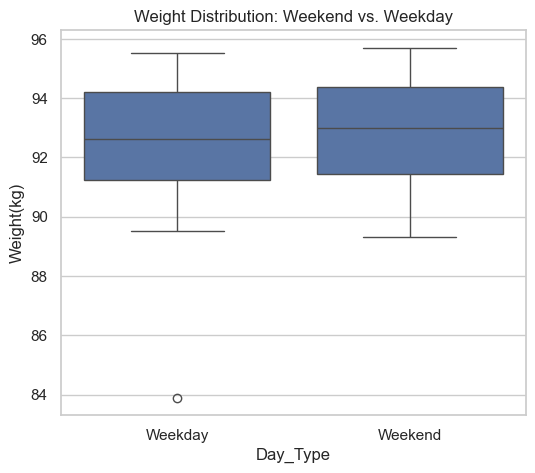

In [9]:
# 8.1 Weekend vs. Weekday Weight
weekend_weight = df[df['Day_Type'] == 'Weekend']['Weight(kg)']
weekday_weight = df[df['Day_Type'] == 'Weekday']['Weight(kg)']
t_stat_3, p_val_3 = stats.ttest_ind(weekend_weight, weekday_weight, equal_var=False)
print("Weekend vs. Weekday Weight:")
print(f"  T-stat: {t_stat_3:.3f}, p-value: {p_val_3:.3f}")

# 8.2 Quick boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
sns.boxplot(x='Day_Type', y='Weight(kg)', data=df)
plt.title("Weight Distribution: Weekend vs. Weekday")
plt.show()

**Interpretation**:
- If p < 0.05, we might say there is a significant difference in average weight.
- You could also compare step counts or calorie intake in the same manner.

_If additional time-based patterns (e.g., a month’s worth of data) exist, you could do line plots over time to see trends. With a relatively small dataset, this is limited._

<a id='conclusion'></a>
## 9. Conclusion
**Summary of Findings**
- **Calorie Intake & Weight**: We explored correlation, possibly a scatter plot, to see if daily calories align with weight changes. If correlation is small or p > 0.05, the relationship may be weak.
- **Physical Activity**: T-tests on `Gym_Bool` vs. Weight, and high-step vs. low-step, indicate whether more activity correlates with lower weight.
- **Interplay**: A multiple regression can show if combining calories + steps better explains weight variation.
- **Temporal Patterns**: We tested if `Day_Type` (weekend vs. weekday) influences weight or steps.

**Next Steps**
1. **Refine Feature Engineering**: Possibly incorporate sleep, water intake, or macros if available.
2. **Longer Data Collection**: More data across months or years for stronger time-series analysis.
3. **Advanced Modeling**: Use machine learning methods (e.g., random forests, gradient boosting) or multi-variate time-series to predict weight changes.

_This concludes our data analysis notebook for the personal health dataset._